In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
cancerdb = pd.read_csv('/home/blair/cognixia/kaggle_cancerdb.csv')

# print(cancerdb['tissue'].dropna())

In [101]:
# DATA FRAME DISPLAYING TITLE, TISSUE, LOCATION, TYPE, and US CASES PER YEAR
'''
This data frame display extracts specified columns (title, tissue, geographic location, type of cancer, 
and cases recorded per year in the USA) of data from a cancer research database. The "Title" column names
one of two things, the treatment center or the type of cancer. The "Tissue" column refers to the tissue within
the body that is affected by the cancer. The "Location" column exhibits the geographic location of where the cancer
center is located (note the missing locations also have an unspecified treatment center). The "Type" column
represents the type of cancer that was recorded. Lastly, the "US Cases Per Year" column displays the amount of cases
recorded in the U.S. per year for a specified type of cancer.

'''

# created data frame and used fillna() method to replace NaN values in each column
cancerDataFrame = pd.DataFrame({
    'Title:': cancerdb['title'][:30].fillna('*No Title Recorded'),
    'Tissue:': cancerdb['tissue'][:30].fillna('*No Tissue Type Recorded'),
    'Location:': cancerdb['city'][:30].fillna('*No Location Recorded'),
    'Type:': cancerdb['mainType'][:30].fillna('*No Type Recorded'),
    'US Cases Per Year:': cancerdb['uscsCasesPerYear'][:30].fillna('*No Record')
    
})

cancerDataFrame

,Title:,Tissue:,Location:,Type:,US Cases Per Year:
0,Jonsson Comprehensive Cancer Center,*No Tissue Type Recorded,"Los Angeles, California",*No Type Recorded,*No Record
1,Breast Cancer,Breast,*No Location Recorded,"Breast Cancer, NOS",264115.0
2,Lung Cancer,Lung,*No Location Recorded,"Lung Cancer, NOS",221020.0
3,Skin Cancer,Skin,*No Location Recorded,"Skin Cancer, NOS",88001.0
4,Alvin J. Siteman Cancer Center,*No Tissue Type Recorded,"St. Louis, Missouri",*No Type Recorded,*No Record
5,Bladder Cancer,Bladder/Urinary Tract,*No Location Recorded,"Bladder/Urinary Tract Cancer, NOS",74949.0
6,Fox Chase Cancer Center,*No Tissue Type Recorded,"Philadelphia, Pennsylvania",*No Type Recorded,*No Record
7,Huntsman Cancer Institute,*No Tissue Type Recorded,"Salt Lake City, Utah",*No Type Recorded,*No Record
8,Prostate Cancer,Prostate,*No Location Recorded,"Prostate Cancer, NOS",224703.0
9,David H. Koch Institute for Integrative Cancer...,*No Tissue Type Recorded,"Cambridge, Massachusetts",*No Type Recorded,*No Record


In [102]:
#Combining columns cases per year and type to determine most popular types of cases
usCases_mainType = pd.DataFrame(cancerdb, columns=['uscsCasesPerYear', 'mainType'])

# used fillna() method to replace NaN values with a specified value
mostCases = usCases_mainType[:30].fillna('*No Record')

# used rename method to rename the columns
mostCases.rename(columns={'uscsCasesPerYear': 'US Cases Per Year', 'mainType': 'Type'}, inplace=True)
mostCases



,US Cases Per Year,Type
0,*No Record,*No Record
1,264115.0,"Breast Cancer, NOS"
2,221020.0,"Lung Cancer, NOS"
3,88001.0,"Skin Cancer, NOS"
4,*No Record,*No Record
5,74949.0,"Bladder/Urinary Tract Cancer, NOS"
6,*No Record,*No Record
7,*No Record,*No Record
8,224703.0,"Prostate Cancer, NOS"
9,*No Record,*No Record


In [111]:
# RETURNS US CASES PER YEAR AND TYPE OF CANCER FOR THOSE CASES IN DESCENDING ORDER
'''
This data frame display correlates different types of cancers with the amount of cases recorded per year in the U.S. 
Upon analysis of the data provided, the conclusion can be drawn that breast cancer is the leading cancer 
diagnosis across the states followed by prostate and lung cancers. This display orders the number of cases 
per year from greateast to least allowing an individual to conveniently analyze and draw conclusions as it 
relates to the correlation between types of cancers and the amount of cases recorded per year.

'''

# Used lambda function checking if the case exist then return the case. Also used dropna() method to extract all NaN values.
grouped = usCases_mainType.groupby(['uscsCasesPerYear'], group_keys=False).apply(lambda cases: cases).dropna()

# renamed columns
grouped.rename(columns={'...': 'Cases', 'mainType': 'Type'}, inplace=True)

# returns order max to min
grouped.sort_values(by=['uscsCasesPerYear'], ascending=False)

# # returns order min to max
# grouped.sort_values(by=['uscsCasesPerYear'], ascending=True)



,uscsCasesPerYear,Type
1,264115.0,"Breast Cancer, NOS"
8,224703.0,"Prostate Cancer, NOS"
2,221020.0,"Lung Cancer, NOS"
22,142438.0,"Bowel Cancer, NOS"
3,88001.0,"Skin Cancer, NOS"
5,74949.0,"Bladder/Urinary Tract Cancer, NOS"
49,71565.0,Non-Hodgkin Lymphoma
25,68020.0,"Kidney Cancer, NOS"
27,59447.0,"Uterine Cancer, NOS"
12,53957.0,"Pancreatic Cancer, NOS"


In [113]:
# RETURNS MAX, MIN, AND AVG NUMBER OF CASES PER YEAR
grouped.agg(max=('uscsCasesPerYear', 'max'),
            min=('uscsCasesPerYear', 'min'),
            avg=('uscsCasesPerYear', 'mean')
            )

,uscsCasesPerYear
max,264115.000000
min,8515.000000
avg,79996.388889


In [105]:
# COUNTS THE TOTAL AMOUNT OF UNIQUE TYPES OF CANCERS IN DATABASE AND DISPLAYS THE UNIQUE TYPES
totalTypes = cancerdb['mainType'].unique()
len(totalTypes)
# totalTypes.rename(columns={'0': 'Type'}, inplace=True)
print(f' There are {len(totalTypes) - 1} different types of cancers in this database. \n See Types Below:')
print(pd.DataFrame(totalTypes).dropna())

 There are 116 different types of cancers in this database. 
 See Types Below:
                                                   0
1                                 Breast Cancer, NOS
2                                   Lung Cancer, NOS
3                                   Skin Cancer, NOS
4                  Bladder/Urinary Tract Cancer, NOS
5                               Prostate Cancer, NOS
..                                               ...
112                   Primary CNS Melanocytic Tumors
113                       Renal Neuroendocrine Tumor
114                                    Sialoblastoma
115                     Tubular Adenoma of the Colon
116  Undifferentiated Embryonal Sarcoma of the Liver

[116 rows x 1 columns]


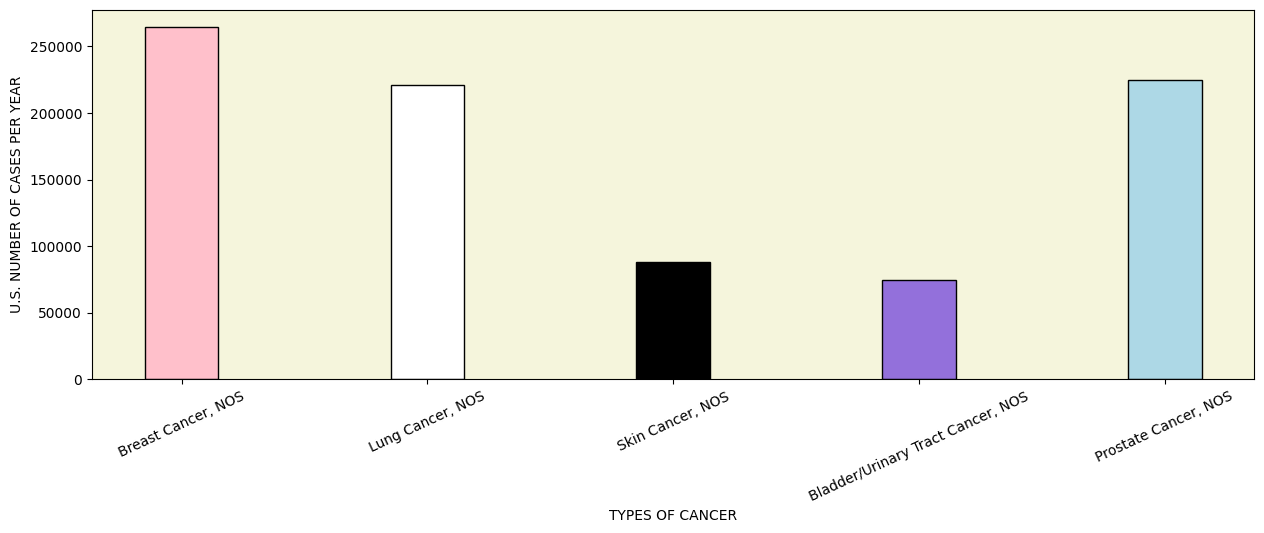

In [106]:

x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()
axes = plt.axes()

plt.bar(x, y, width=0.3, color=('pink', 'white', 'black', 'mediumpurple', 'lightblue'), edgecolor='black')
axes.set_facecolor('beige')

plt.xlabel('TYPES OF CANCER')
plt.ylabel('U.S. NUMBER OF CASES PER YEAR')

plt.xticks(rotation = 25)

figure.set_figwidth(15)

# print(grouped.sort_values(by=['uscsCasesPerYear'], ascending=False)[:5])
# print(grouped['uscsCasesPerYear'][:5].astype(int))
# print(usCases_mainType['mainType'][:10].dropna())


Text(0.5, 1.0, 'TOP 5 TYPES OF CANCER')

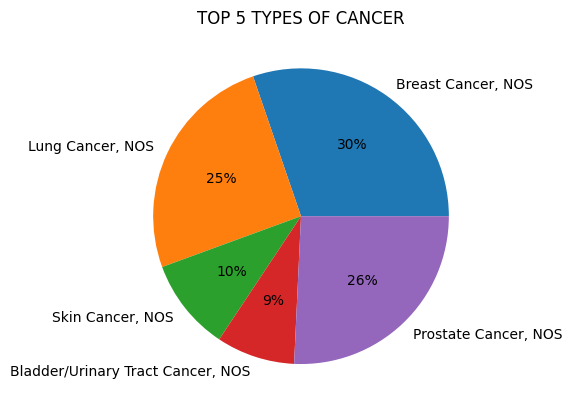

In [122]:
x = usCases_mainType['mainType'][:10].dropna()
y = grouped['uscsCasesPerYear'][:5].astype(int)
figure = plt.figure()
axes = plt.axes()

plt.pie(y, labels=x, autopct='%1.f%%')
plt.title('TOP 5 TYPES OF CANCER')